In [63]:
import sys
sys.path.insert(0, "../")

In [64]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pickle


In [65]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [66]:
df_train = pd.read_csv("../dataset/train.csv")
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [67]:
df_test = pd.read_csv("../dataset/test.csv")
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [68]:
print(f"The number of rows in the data is {df_train.shape[0]}.")
print(f"The number of columns in the data is {df_train.shape[1]}.")
print(f"The names of features in the data are {df_train.columns}.")

The number of rows in the data is 2000.
The number of columns in the data is 21.
The names of features in the data are Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object').


In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc


| Tên trường | Ý nghĩa |
|---|---| 
| battery_power | Dung lượng pin tính theo mAh
| blue | Có bluetooth hay không
| clock_speed | Tốc độ vi xử lý
| dual_sim | Có 2 sim không
| fc | Số megapixels camera trước
| four_g | Có 4G hay không
| three_g | Có 3G hay không
| int_memory | Bộ nhớ trong tính bằng GB
| m_dep | Độ dày điện thoại tính theo cm
| mobile_wt | Trọng lượng điện thoại
| n_cores | Số lõi xử lý
| pc | Số megapixels camera chính
| px_height | Độ phân giải theo chiều dài
| px_width | Độ phân giải theo chiều rộng ram RAM tính theo MB
| sc_h | Chiều dài màn hình tính theo cm
| sc_w | Chiều rộng màn hình tính theo cm
| talk_time | Thời gian sử dụng dài nhất trong một lần sạc pin
| touch_screen | Có touch screen hay không
| wifi | Có wifi hay không
| price_range | Đây là output của mô hình với 4 giá trị 0(low cost), 1(medium cost), 2(high cost) và 3(very high cost).


In [70]:
## splitting the data into independent and dependent features
X = df_train.drop('price_range',axis=1)
y = df_train['price_range']

# Insight train data

In [8]:
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [9]:
# The unique values of each features
for feature in X.columns:
    print(f"\"{feature}\" : {X[feature].unique()} (Total {X[feature].nunique()} values).\n")

"battery_power" : [ 842 1021  563 ... 1139 1467  858] (Total 1094 values).

"blue" : [0 1] (Total 2 values).

"clock_speed" : [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7] (Total 26 values).

"dual_sim" : [0 1] (Total 2 values).

"fc" : [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19] (Total 20 values).

"four_g" : [0 1] (Total 2 values).

"int_memory" : [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62] (Total 63 values).

"m_dep" : [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2] (Total 10 values).

"mobile_wt" : [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 19

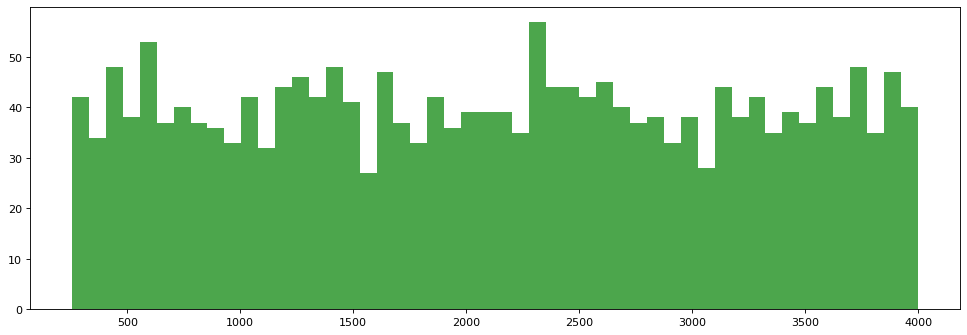

In [10]:
figure(figsize=(15, 5), dpi=80)
n, bins, patches = plt.hist(X['ram'], bins=50, density = 0,  color ='green', alpha = 0.7)
# plt.bar_label(patches)
plt.show()

In [11]:
cat_feat = []
for feature in X.columns:
    if X[feature].nunique() <= 5:
        cat_feat.append(feature)
        
num_feat = [feature for feature in X.columns if feature not in cat_feat]
        
print(f"The categorical feature in the data are {cat_feat} ( {len(cat_feat)} features).\n")
print(f"The numerical feature in the data are {num_feat} ({len(num_feat)} features).")

The categorical feature in the data are ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'] ( 6 features).

The numerical feature in the data are ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'] (14 features).


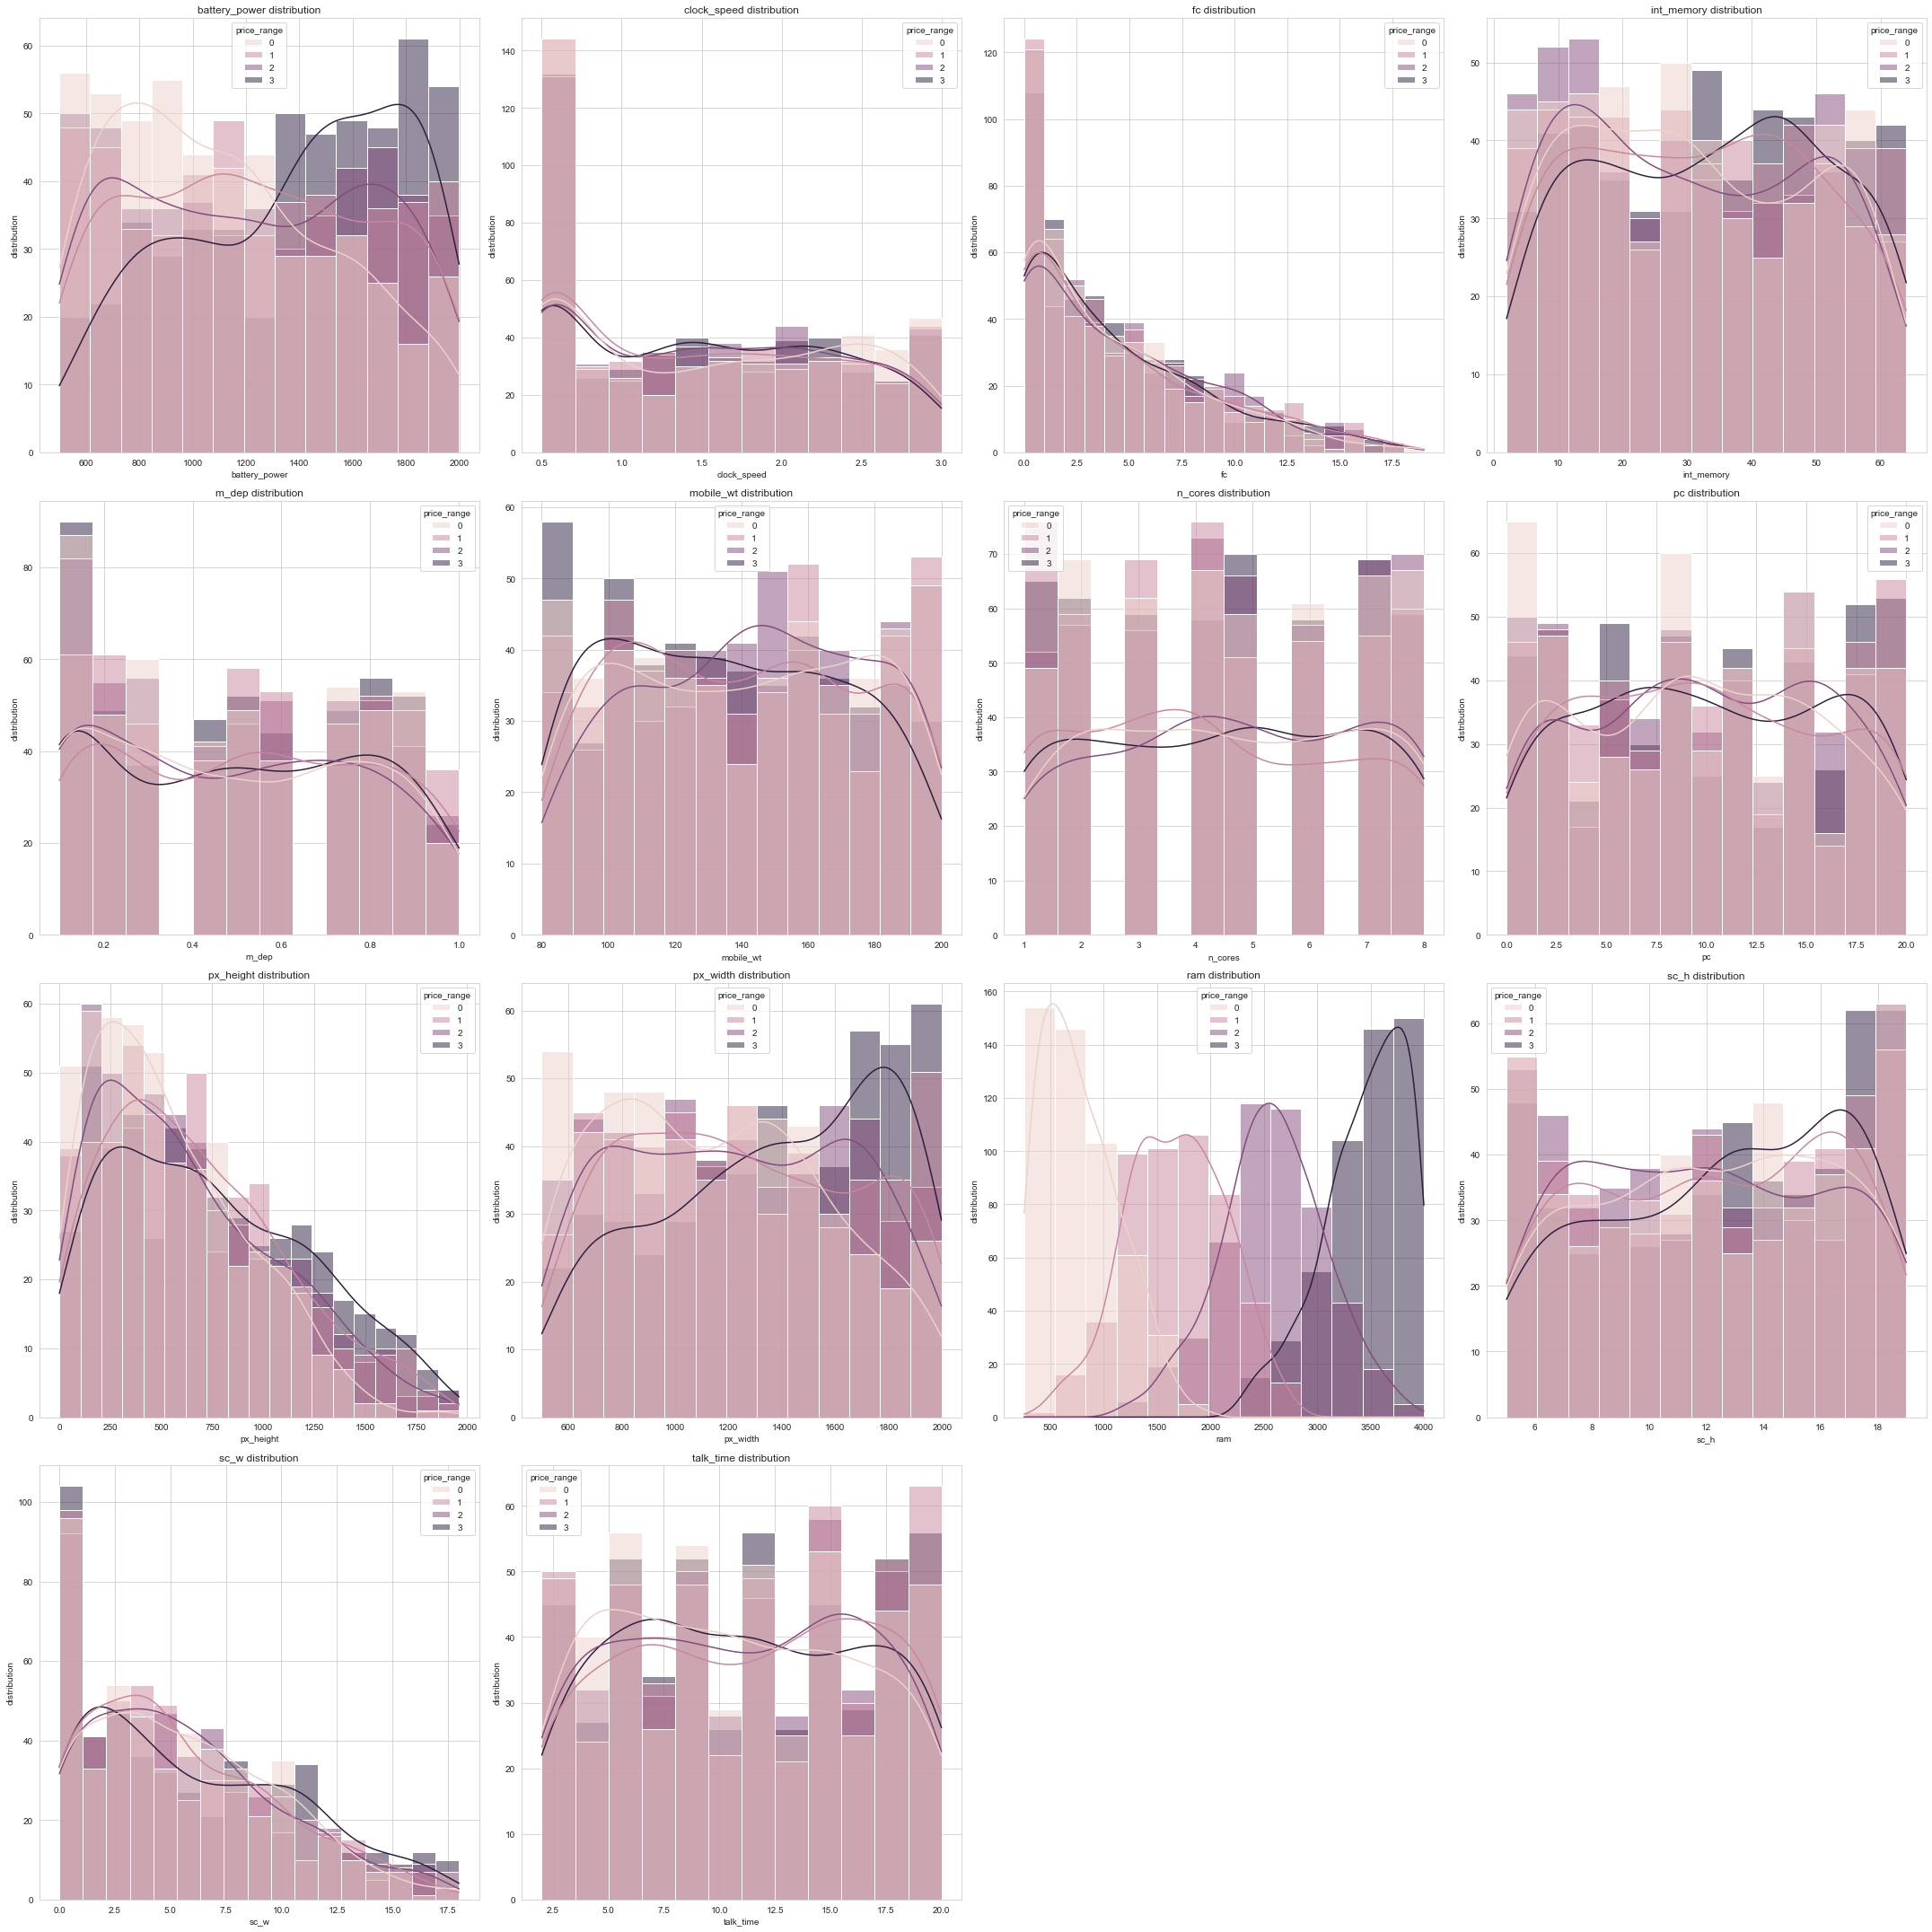

In [46]:
plt.figure(figsize=(30,30))

for index, feature in enumerate(num_feat):
    plt.subplot(4,4,index+1)
    sns.histplot(data=df_train,x=feature, kde=True, color='b', hue="price_range")
    plt.xlabel(feature)
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")

plt.tight_layout()

Các thuộc tính có độ liên quan cao đến price_range: battery, ram

In [23]:
X['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

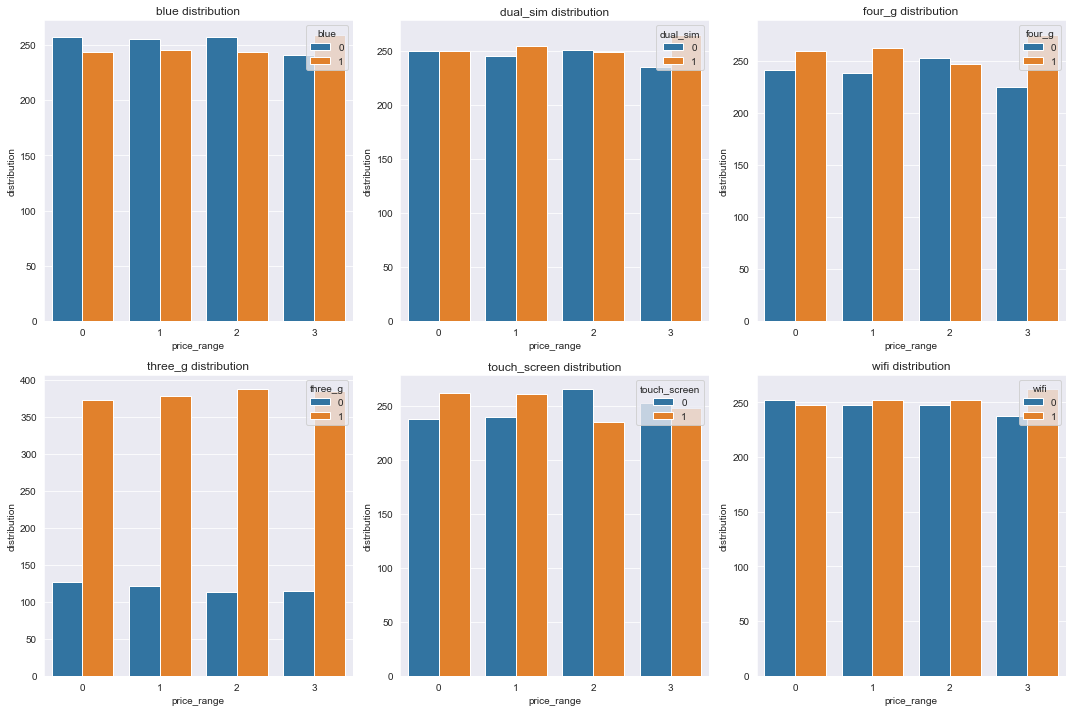

In [32]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')

for index, feature in enumerate(cat_feat):
    plt.subplot(2,3,index+1)
    sns.countplot(data=df_train,  x="price_range", hue=feature)
    plt.xlabel("price_range")
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")

plt.tight_layout()

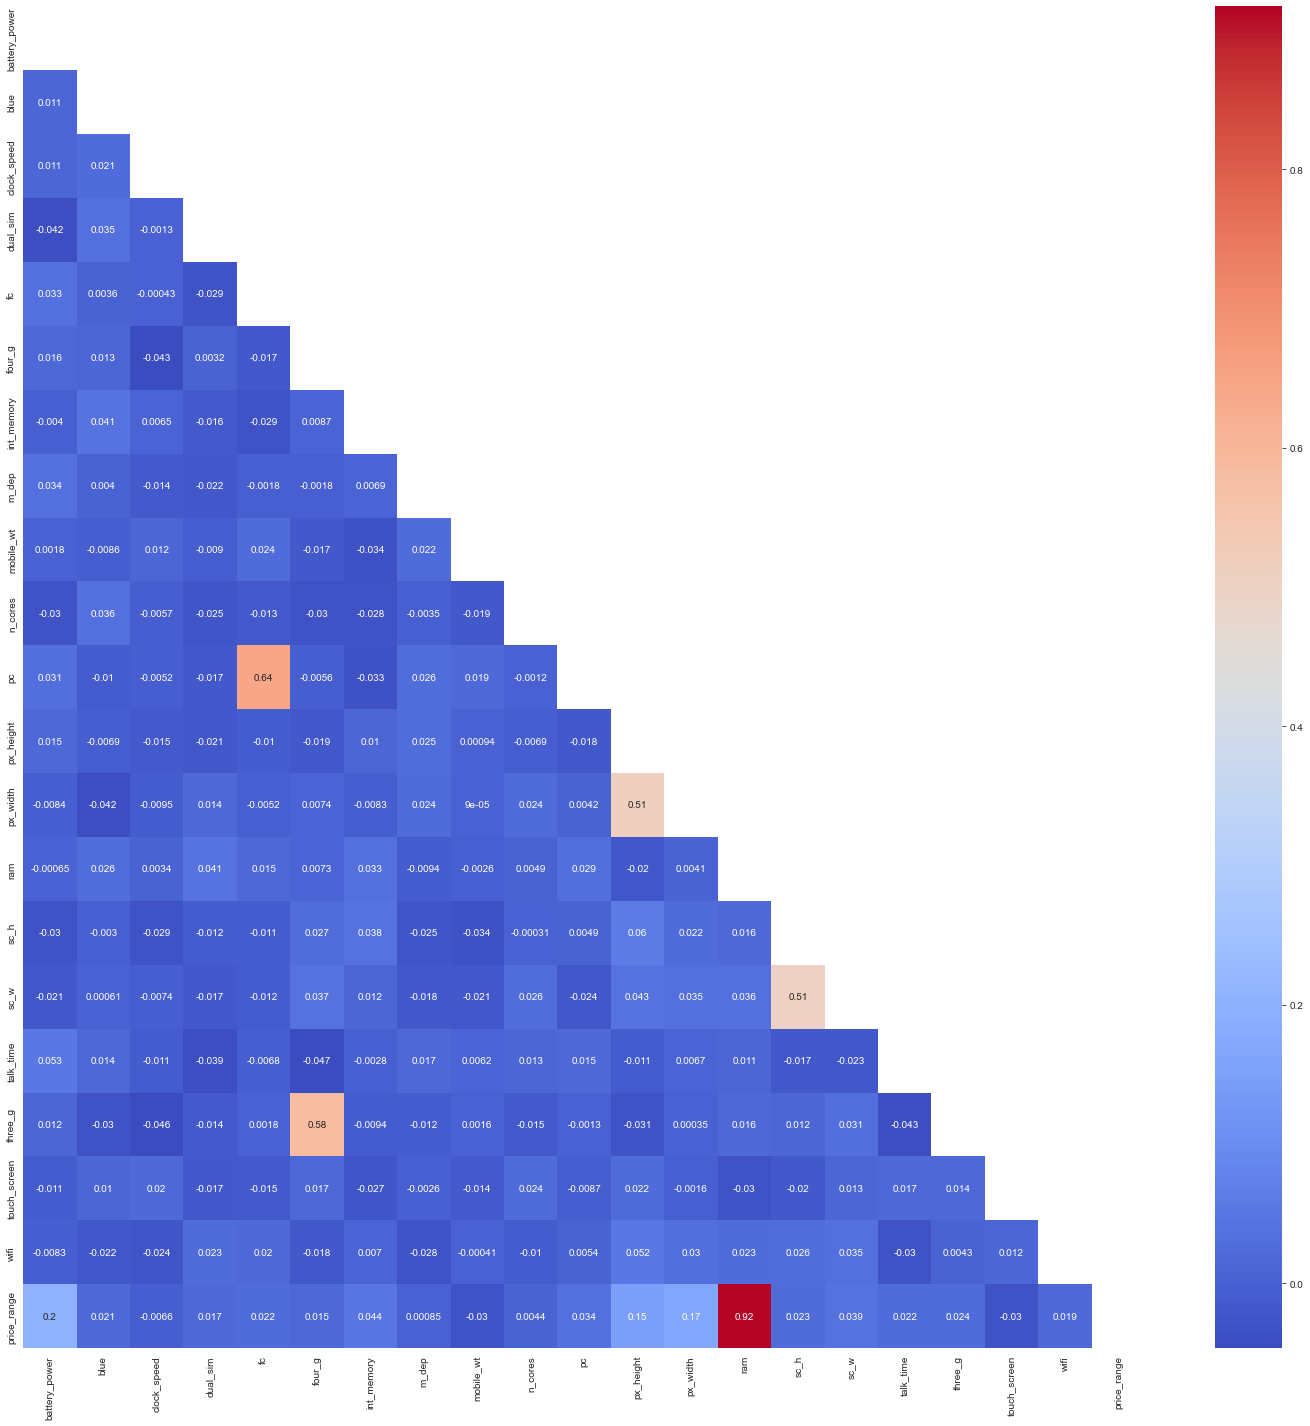

In [38]:
## plotting the correlation between the features

sns.set_style('whitegrid')
plt.figure(figsize=(20,20))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.tight_layout()

<AxesSubplot: >

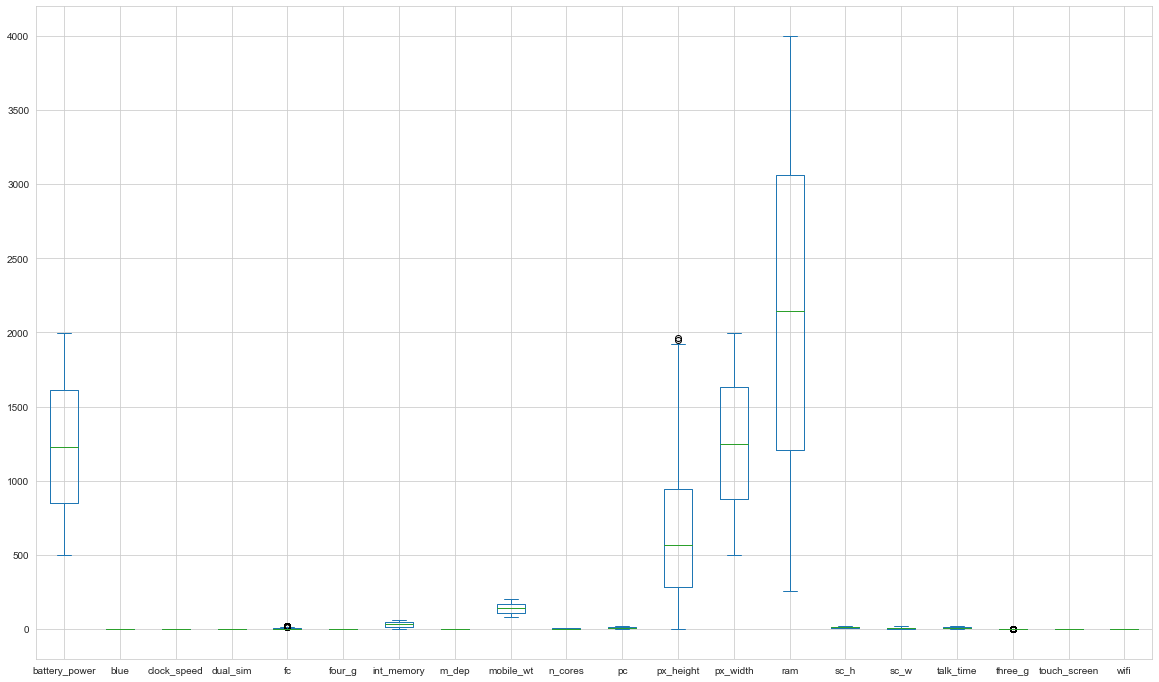

In [39]:
## Let's check for outliers in our data
df_train[X.columns].plot(kind='box',figsize=(20,12))

In [43]:
y.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# Split train val

In [71]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [72]:
X = X[['ram', 'battery_power', 'px_height', 'px_width']]
X

,ram,battery_power,px_height,px_width
0,2549,842,20,756
1,2631,1021,905,1988
2,2603,563,1263,1716
3,2769,615,1216,1786
4,1411,1821,1208,1212
...,...,...,...,...
1995,668,794,1222,1890
1996,2032,1965,915,1965
1997,3057,1911,868,1632
1998,869,1512,336,670


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)
print(f"Number samples of train data: {X_train.shape}")
print(f"Number samples of train data: {X_val.shape}")
print("Train labels distribution: \n", y_train.value_counts())
print("Validation labels distribution: \n", y_val.value_counts())

Number samples of train data: (1600, 4)
Number samples of train data: (400, 4)
Train labels distribution: 
 1    409
2    408
0    395
3    388
Name: price_range, dtype: int64
Validation labels distribution: 
 3    112
0    105
2     92
1     91
Name: price_range, dtype: int64


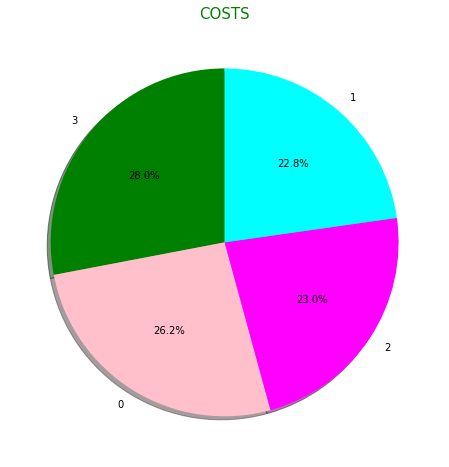

In [74]:
import matplotlib.pyplot as plt
labels = y_val.value_counts().index
sizes = y_val.value_counts()
colors = ['green','pink','magenta','cyan',"orange","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

# Training

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [76]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
model = SGDClassifier()
model = LogisticRegression(multi_class = 'multinomial', solver="lbfgs")

In [77]:
model.fit(X_train,y_train)

c:\Users\dell\miniconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(multi_class='multinomial')

In [78]:
predictions = model.predict(X_val)
unique, counts = np.unique(predictions, return_counts=True)
unique


array([0, 1, 2, 3], dtype=int64)

Accuracy:  0.9725
Confusion matrix:  [[103   2   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   4 108]]


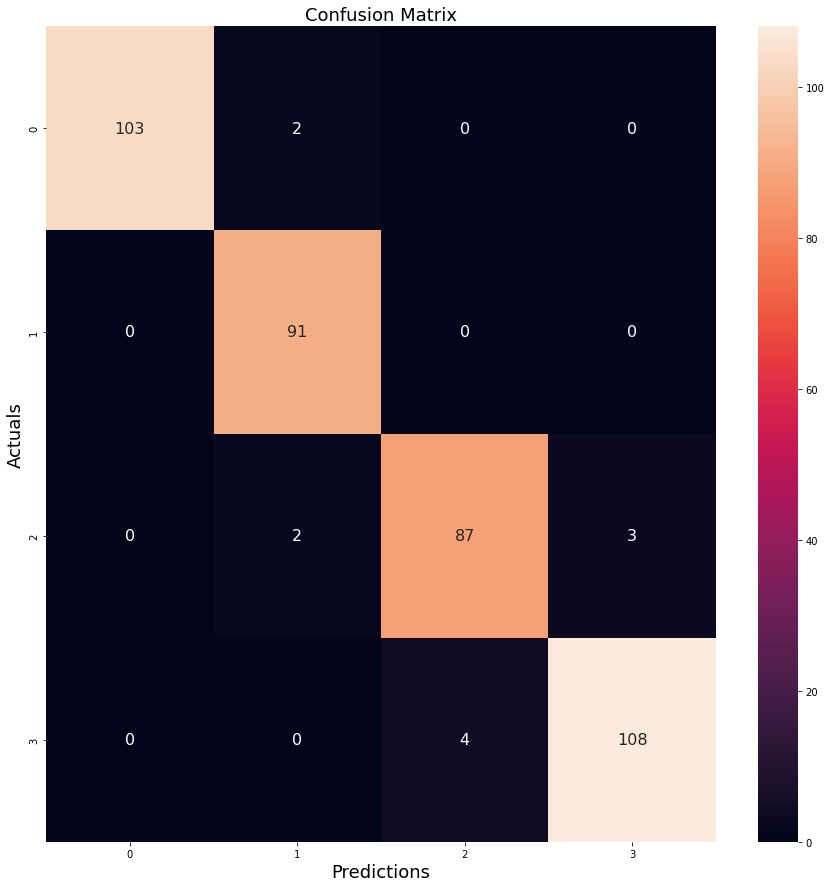

In [79]:
print("Accuracy: ", accuracy_score(y_val, predictions))
print("Confusion matrix: ", confusion_matrix(y_val, predictions))
conf_matrix = confusion_matrix(y_val, predictions)
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True,  annot_kws={"size": 16}, fmt='g')

 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [80]:
pickle.dump(model, open("../weights/SoftmaxRegression.pkl", "wb"))

In [81]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)

In [82]:
model.fit(X_train,y_train)
predictions = model.predict(X_val)
unique, counts = np.unique(predictions, return_counts=True)
unique

array([0, 1, 2, 3], dtype=int64)

In [83]:
model.get_depth()
model.get_n_leaves()

16

In [84]:
X_train

,ram,battery_power,px_height,px_width
968,1489,1923,767,1759
240,3560,633,529,1009
819,1406,1236,517,809
692,3508,781,304,1674
420,1587,1456,823,1104
...,...,...,...,...
1130,3022,1975,775,1607
1294,362,589,759,1858
860,2080,1829,729,1267
1459,2916,1927,491,1506


Accuracy:  0.8
Confusion matrix:  [[94 11  0  0]
 [ 5 68 18  0]
 [ 0 12 66 14]
 [ 0  0 20 92]]


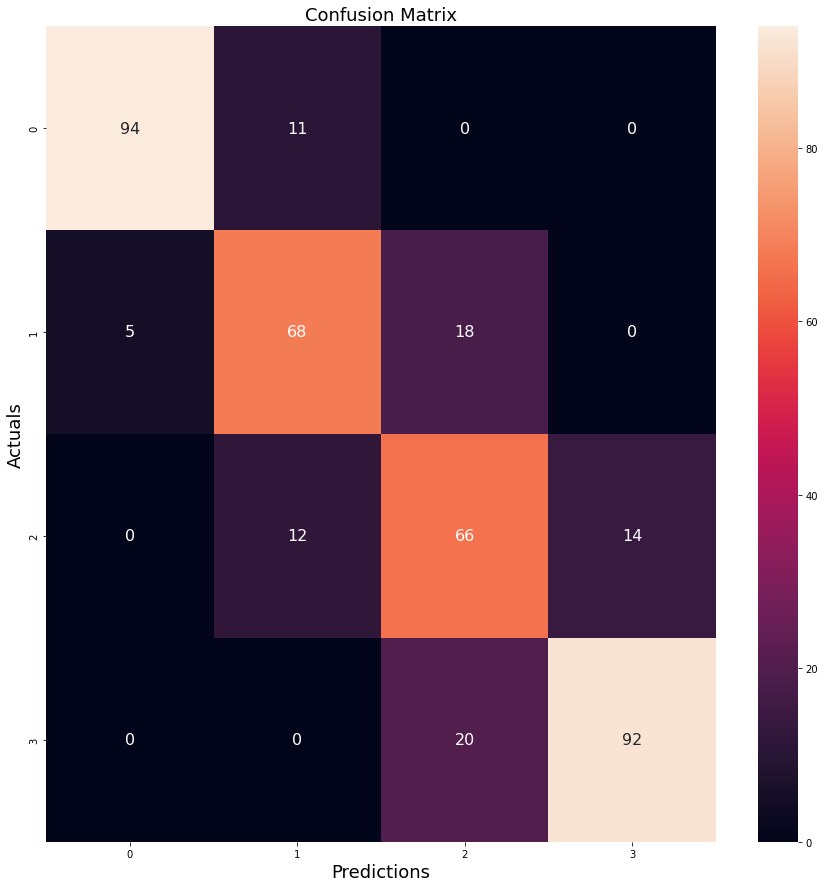

In [85]:
print("Accuracy: ", accuracy_score(y_val, predictions))
print("Confusion matrix: ", confusion_matrix(y_val, predictions))
conf_matrix = confusion_matrix(y_val, predictions)
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True,  annot_kws={"size": 16}, fmt='g')

 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [86]:
import graphviz
from sklearn import tree

In [87]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 2217.50
|   |--- feature_0 <= 1052.50
|   |   |--- feature_2 <= 1445.00
|   |   |   |--- feature_1 <= 1815.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  1815.50
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  1445.00
|   |   |   |--- feature_1 <= 748.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  748.50
|   |   |   |   |--- class: 1
|   |--- feature_0 >  1052.50
|   |   |--- feature_1 <= 1007.50
|   |   |   |--- feature_0 <= 1541.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1541.00
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  1007.50
|   |   |   |--- feature_0 <= 1896.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1896.50
|   |   |   |   |--- class: 2
|--- feature_0 >  2217.50
|   |--- feature_0 <= 3013.50
|   |   |--- feature_1 <= 573.50
|   |   |   |--- feature_0 <= 2821.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  2821.50
|   |   |   |   |--- class: 2
|   |   |--

In [88]:
# # DOT data
# dot_data = tree.export_graphviz(model, out_file="tree.png", 
#                                   feature_names=['ram', 'battery_power', 'px_height', 'px_width'],
#                                   class_names=['0','1', '2', '3'],
#                                 filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph

In [89]:
# from dtreeviz.trees import dtreeviz
# #


In [52]:

# viz = DTreeVizRender(model, X_train, y_train,
#                 target_name="target",
#                 feature_names=['ram', 'battery_power', 'px_height', 'px_width'],
#                 class_names=['0','1', '2', '3'])

# viz

[Text(0.5, 0.9, 'x[0] <= 2217.5\ngini = 0.75\nsamples = 1600\nvalue = [395, 409, 408, 388]'),
 Text(0.25, 0.7, 'x[0] <= 1052.5\ngini = 0.587\nsamples = 840\nvalue = [395, 357, 88, 0]'),
 Text(0.125, 0.5, 'x[2] <= 1445.0\ngini = 0.164\nsamples = 334\nvalue = [304, 30, 0, 0]'),
 Text(0.0625, 0.3, 'x[1] <= 1815.5\ngini = 0.112\nsamples = 320\nvalue = [301, 19, 0, 0]'),
 Text(0.03125, 0.1, 'gini = 0.056\nsamples = 280\nvalue = [272, 8, 0, 0]'),
 Text(0.09375, 0.1, 'gini = 0.399\nsamples = 40\nvalue = [29, 11, 0, 0]'),
 Text(0.1875, 0.3, 'x[1] <= 748.5\ngini = 0.337\nsamples = 14\nvalue = [3, 11, 0, 0]'),
 Text(0.15625, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1, 0, 0]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0]'),
 Text(0.375, 0.5, 'x[1] <= 1007.5\ngini = 0.52\nsamples = 506\nvalue = [91, 327, 88, 0]'),
 Text(0.3125, 0.3, 'x[0] <= 1541.0\ngini = 0.514\nsamples = 174\nvalue = [74, 96, 4, 0]'),
 Text(0.28125, 0.1, 'gini = 0.292\nsamples = 79\nvalue = [65, 14, 

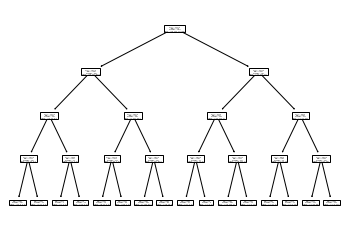

In [61]:
from sklearn.tree import plot_tree

plot_tree(model)

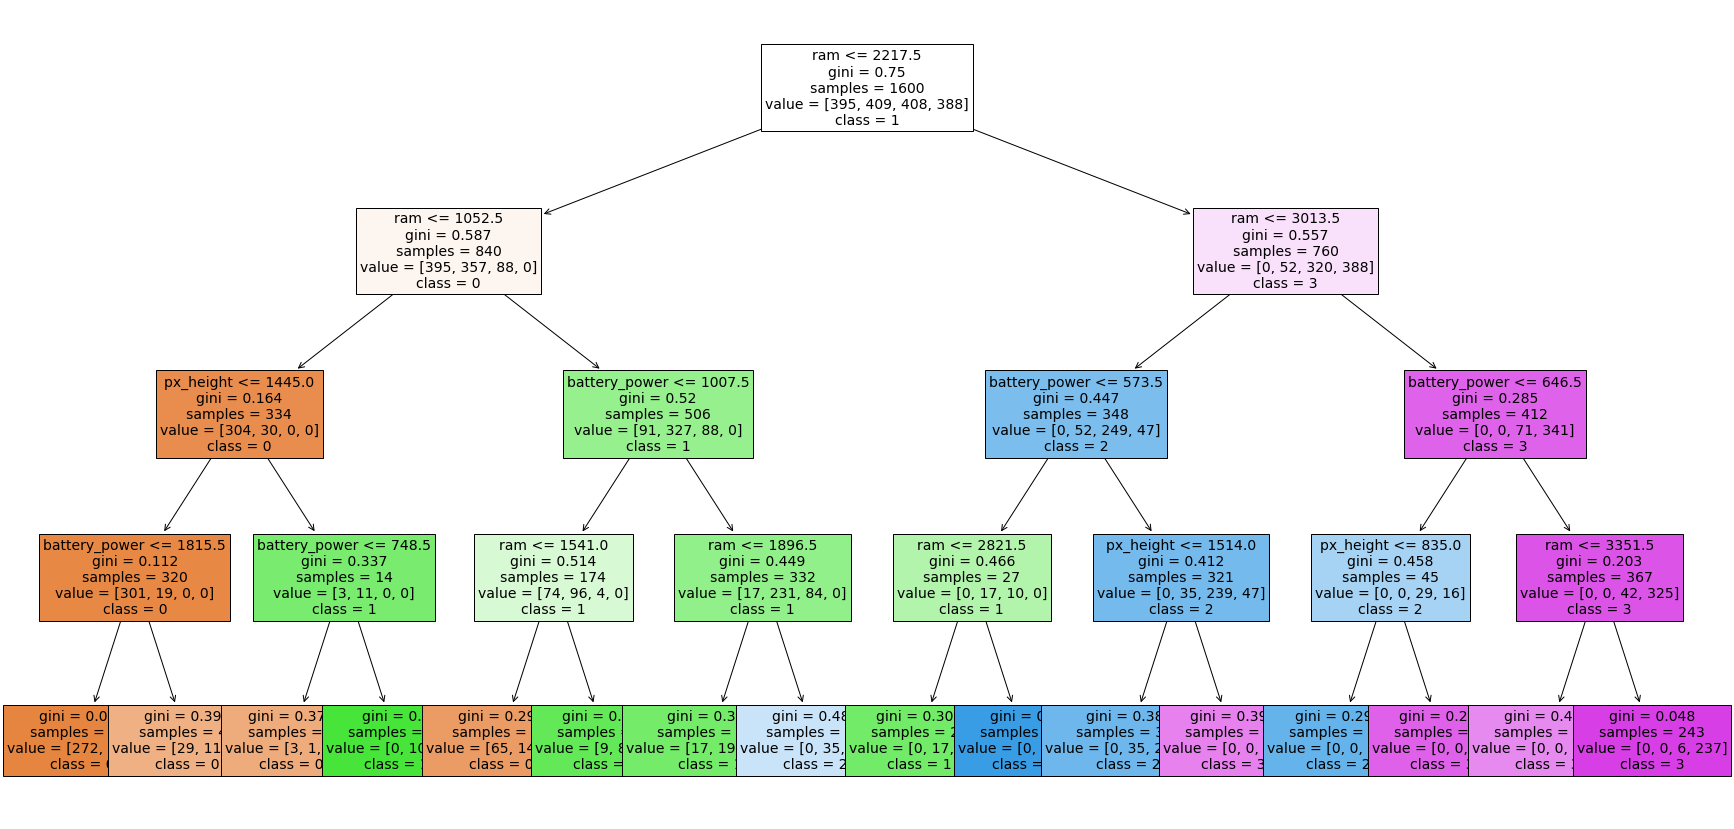

In [60]:
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(model, 
                   feature_names=['ram', 'battery_power', 'px_height', 'px_width'],
                                  class_names=['0','1', '2', '3'],
                   filled=True, fontsize=14)

In [90]:
pickle.dump(model, open("../weights/DecisionTree.pkl", "wb"))